In [1]:
from post_process import load
from file_paths import *
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from matplotlib.ticker import PercentFormatter
from scipy.stats import chi2_contingency
plt.rcParams['figure.dpi'] = 150


In [46]:
wt = load(path_dir_s1 + 'wt_numer.pkl')
rbt = load(path_dir_s1 + 'rbt_numer.pkl')

In [47]:
wt_b = np.array(wt)[[5,6,7]]
rbt_b = np.array(rbt)[[5,6,7]]

rbt_imp = np.percentile(rbt_b, 97, axis=-1)
(rbt_imp - rbt_imp[0])/rbt_imp[0]

array([ 0.        , -0.03390412, -0.19028045])

In [2]:
# for the weight analysis
w3 = load(path_p_ddqn_ha3)
w5 = load(path_p_ddqn_ha5)
w7 = load(path_p_ddqn_ha7)
w9 = load(path_p_ddqn_ha9)
w11 = load(path_p_ddqn_ha11)
rbt_w = load('out/compare/weights/rbt_numer.pkl')
wt_w = load('out/compare/weights/wt_numer.pkl')
tt_w = load('out/compare/weights/all_trip_t.pkl')

In [3]:
np.percentile(rbt_w, 75, axis=-1), np.percentile(wt_w, 75, axis=-1), np.percentile(tt_w, 75, axis=-1)

(array([2.19492991, 2.01148135, 2.0165655 , 2.00479464, 2.13284607]),
 array([3.10988768, 2.87529402, 2.8610118 , 2.78767852, 2.90632763]),
 array([4353.35 , 4339.9  , 4365.375, 4317.625, 4371.225]))

In [4]:
np.std(wt_w, axis=-1), np.std(rbt_w, axis=-1), np.std(tt_w, axis=-1)

(array([0.23354261, 0.20686344, 0.2603863 , 0.21401859, 0.26009711]),
 array([0.3263047 , 0.34221371, 0.33373936, 0.28816981, 0.35737393]),
 array([249.29834848, 253.16923413, 232.37848116, 221.07708329,
        227.22135357]))

In [5]:
# for hypothesis testing on wait time groups
nc = load(path_p_nc_b)
eh = load(path_p_eh_b)
ddqnla = load(path_p_ddqn_la_b)
ddqnha = load(path_p_ddqn_ha_b)

In [6]:
all_pax = []

for scenario, name_scen in zip([nc, eh, ddqnla, ddqnha], ['nc', 'eh', 'ddqnla', 'ddqnha']):
    for replication in scenario:
        all_pax += [[p.orig_idx, p.wait_time, name_scen] for p in replication]

In [7]:
wt_by_scen = pd.DataFrame(all_pax, columns=['orig_idx', 'wait_time', 'scenario'])

In [8]:
wtc = wt_by_scen.groupby(['orig_idx', 'scenario'])['wait_time'].mean().reset_index()

In [9]:
wtcount = wt_by_scen.groupby(['orig_idx'])['wait_time'].count().reset_index()

In [10]:
spec_stop = wt_by_scen[wt_by_scen['orig_idx']==53].copy()
for sc in spec_stop['scenario'].unique():
    spec_scen = spec_stop[spec_stop['scenario']==sc]
    print(sc, spec_scen.shape[0])

nc 606
eh 629
ddqnla 612
ddqnha 634


In [11]:
ttest_ind(spec_stop.loc[spec_stop['scenario']=='ddqnha', 'wait_time'], spec_stop.loc[spec_stop['scenario']=='eh', 'wait_time'], equal_var=False)

Ttest_indResult(statistic=-2.0049328543272003, pvalue=0.04519045417437392)

In [12]:
ks_2samp(spec_stop.loc[spec_stop['scenario']=='ddqnha', 'wait_time'], spec_stop.loc[spec_stop['scenario']=='eh', 'wait_time'])

KstestResult(statistic=0.06276800088267893, pvalue=0.15642328107944986)

In [13]:
lst2 = spec_stop.loc[spec_stop['scenario']=='eh', 'wait_time'].to_numpy()+0.01
lst1 = spec_stop.loc[spec_stop['scenario']=='ddqnha', 'wait_time'].to_numpy()[:len(lst2)]+0.01
# len(lst1[:len(lst2)]), len(lst2)

In [14]:
observed = [list(lst2), list(lst1)]

In [15]:
result = chi2_contingency(observed)

In [16]:
print(result[0])

70375.67254314902


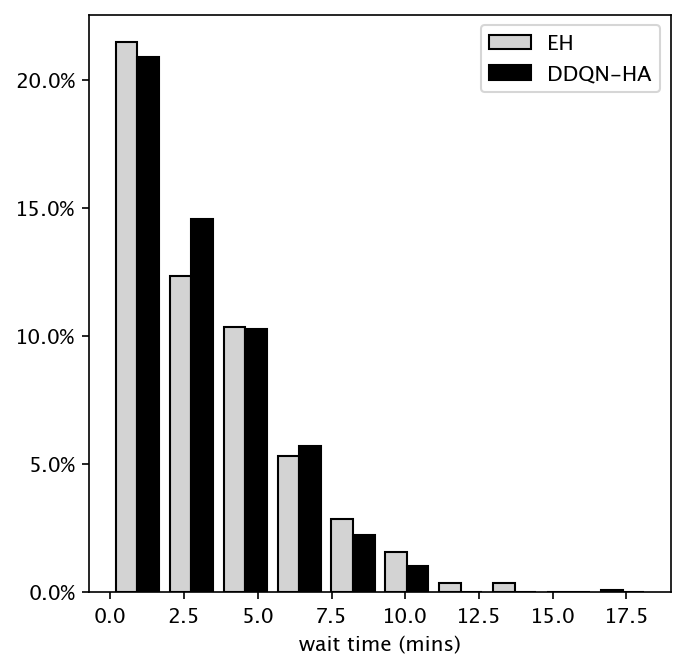

In [17]:
spec_plot = spec_stop[(spec_stop['scenario'].isin(['eh', 'ddqnha']))].copy()
spec_plot.loc[spec_plot['scenario']=='eh', 'scenario'] = 'EH'
spec_plot.loc[spec_plot['scenario']=='ddqnha', 'scenario'] = 'DDQN-HA'
spec_plot['wait_time'] = spec_plot['wait_time']/60
fig, ax = plt.subplots(figsize=(5,5))
# sns.set_theme()
plt.hist([spec_plot.loc[spec_plot['scenario']=='EH', 'wait_time'], spec_plot.loc[spec_plot['scenario']=='DDQN-HA', 'wait_time']], 
         color=['lightgray', 'black'], label=['EH', 'DDQN-HA'], density=True, ec='black')
# sns.histplot(data=spec, x='wait_time', hue='scenario', stat='percent', ax=ax)
ax.set_xlabel('wait time (mins)')
# ax.set_yticks([])
ax.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.axis('off')

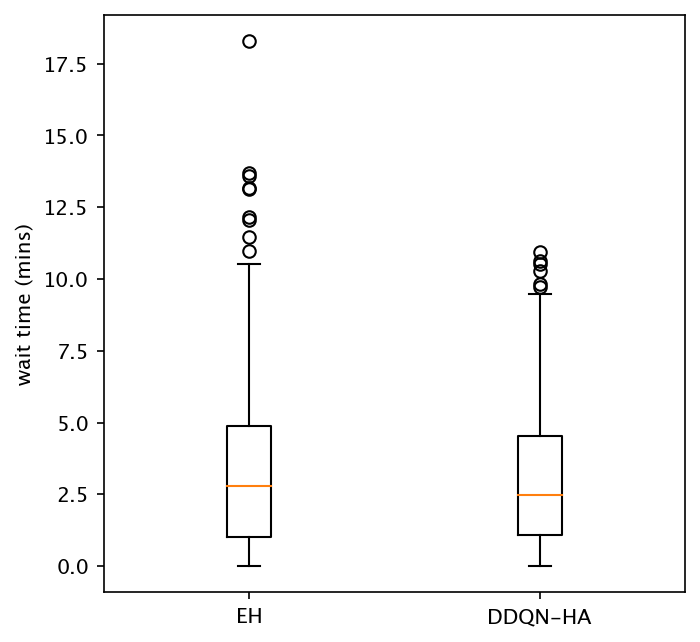

In [21]:
fig, ax = plt.subplots(figsize=(5,5))
# sns.set_theme()
plt.boxplot([spec_plot.loc[spec_plot['scenario']=='EH', 'wait_time'], spec_plot.loc[spec_plot['scenario']=='DDQN-HA', 'wait_time']])
# sns.histplot(data=spec, x='wait_time', hue='scenario', stat='percent', ax=ax)
ax.set_ylabel('wait time (mins)')
ax.set_xticks([1,2], labels=['EH', 'DDQN-HA'])
ax.set_yticks()
# ax.set_yticks([])
# ax.legend()
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
# plt.axis('off')

In [65]:
ddqnha = spec_stop[spec_stop['scenario']=='ddqnha'].copy()
eh = spec_stop[spec_stop['scenario']=='eh'].copy()

In [66]:
ehmean = eh['wait_time'].mean()

change_mean = ddqnha['wait_time'].mean() - eh['wait_time'].mean()

eh95 = eh['wait_time'].quantile(0.95)
change_95 = ddqnha['wait_time'].quantile(0.95) - eh['wait_time'].quantile(0.95)

In [67]:
change_mean/ehmean

-0.0891054871288975

In [68]:
change_95/eh95

-0.12486642930982433

In [11]:
wt_by_scen.groupby('scenario')['wait_time'].apply(lambda x: (x>=5*60).sum()/(x>=0).sum()).reset_index()

,scenario,wait_time
0,ddqnha,0.139153
1,ddqnla,0.150323
2,eh,0.150652
3,nc,0.198018


In [29]:
wt_by_scen_peak = wt_by_scen[wt_by_scen['orig_idx']==48].copy()

In [30]:
wt_by_scen_peak.groupby('scenario')['wait_time'].apply(lambda x: (x>=5*60).sum()/(x>=0).sum()).reset_index()

,scenario,wait_time
0,ddqnha,0.128137
1,ddqnla,0.191367
2,eh,0.187316
3,nc,0.301136


In [58]:
wt_by_scen_peak.groupby('scenario')['wait_time'].mean()

scenario
ddqnha    158.223020
ddqnla    181.697009
eh        164.995069
nc        224.681316
Name: wait_time, dtype: float64

array([[<AxesSubplot:title={'center':'wait_time'}>]], dtype=object)

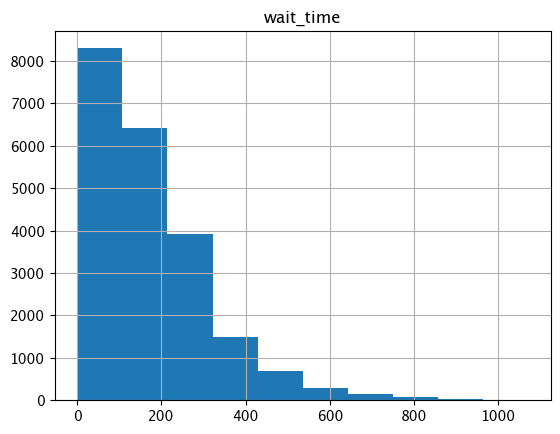

In [16]:
wt_by_scen[wt_by_scen['scenario']=='ddqnla'].hist('wait_time')

Text(0.5, 0, 'wait time (seconds)')

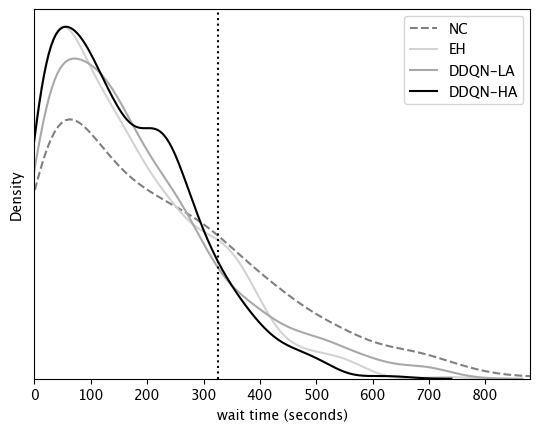

In [57]:
fig, ax = plt.subplots()
styles1 = ['bs-','ro-','y^-', 'po-']
scenarios = ['nc', 'eh', 'ddqnla', 'ddqnha']
scenario_lbls = ['NC', 'EH', 'DDQN-LA', 'DDQN-HA']

linestyles = ['dashed', 'solid', 'solid', 'solid']
colors = ['gray', 'lightgray', 'darkgray', 'black']
for i in range(len(linestyles)):
    sns.kdeplot(
        data=wt_by_scen_peak[wt_by_scen_peak['scenario']==scenarios[i]], x='wait_time', ax=ax, linestyle=linestyles[i], color=colors[i], label=scenario_lbls[i])
plt.legend()
plt.axvline(wt_by_scen_peak.loc[wt_by_scen_peak['scenario']=='ddqnha','wait_time'].quantile(0.9), color='black', linestyle='dotted')
plt.xlim(0,880)
ax.set_yticks([])
ax.set_ylabel('Density')
ax.set_xlabel('wait time (seconds)')